# Climate summary tutorial with the Protocol - Python tool

This notebook tutorial shows how to generate a climate summary for the variables: significant wave height ($H_{m0}$), Peak period ($T_{p}$), Mean wave direction ($Dir_{Wv}$), Wind velocity ($Vel_{Wd}$) and Mean wind direction ($Dir_{Wd}$)

In [1]:
# Python 2/3 setup 
from __future__ import (absolute_import, division, print_function, unicode_literals)
# from builtins import *

In [2]:
# Juypyter setup

%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..', '..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Import Packages

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from climate import read
from climate import summary
from inputadapter import rediam, saih, tests

In [4]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 5)

## Read SIMAR file

This function read the SIMAR file

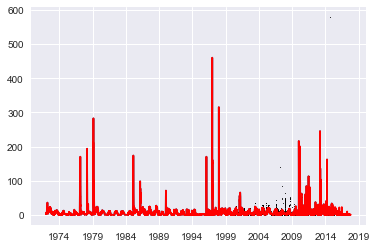

In [40]:
input_file_name = 'caudal_desembalsado'
dams = ['270_BORNOS', '273_GUADALCACIN']
input_path = os.path.join(tests.full_data_path, 'locations', 'eg', 'river_flow', 'rediam')
output_file_name = 'guadalete_estuary_river_discharge.csv'
output_path = os.path.join('output', 'csv')
metadata = {'source': 'rediam',
            'id': '270_BORNOS_273_GUADALCACIN',
            'latitude': 36.693,
            'longitude': -5.858}

# Adapt driver
modf_river_disch_rediam = rediam.river_discharge(input_file_name, metadata, dams, input_path)

# Read the data from de saih from 1972
input_file_name = 'river_flow.txt'
input_path = os.path.join(tests.full_data_path, 'locations', 'eg', 'river_flow', 'saih')
modf_river_disch_saih = saih.river_discharge(input_file_name, metadata, input_path)

# Combine
modf_river_disch = modf_river_disch_saih.combine_first(modf_river_disch_rediam)

# Plot results
fig = plt.figure()
ax = fig.gca()
ax.plot(modf_river_disch_saih)
plt.hold
ax.plot(modf_river_disch_rediam, '.k', markersize=2)
ax.plot(modf_river_disch, 'r')
plt.show()

In [41]:
# Convert to dataframe
river_disch = pd.DataFrame(modf_river_disch)
river_disch


,Q
1972-01-01 00:00:00,3.703704
1972-01-01 01:00:00,3.703704
1972-01-01 02:00:00,3.703704
1972-01-01 03:00:00,3.703704
1972-01-01 04:00:00,3.703704
...,...
2017-09-29 20:00:00,0.297606
2017-09-29 21:00:00,0.294764
2017-09-29 22:00:00,0.292942
2017-09-29 23:00:00,0.293382


In [44]:
#Romeve Nan
modf_river_disch = modf_river_disch.dropna()
modf_river_disch

,Q
1972-01-01 00:00:00,3.703704
1972-01-01 01:00:00,3.703704
1972-01-01 02:00:00,3.703704
1972-01-01 03:00:00,3.703704
1972-01-01 04:00:00,3.703704
...,...
2017-09-29 20:00:00,0.297606
2017-09-29 21:00:00,0.294764
2017-09-29 22:00:00,0.292942
2017-09-29 23:00:00,0.293382


## Example of QSS: Quick SIMAR Summary 

This function (of pandas) generates a quick summary of the different variables included in your data

In [9]:
data_summary = summary.get_summary(modf_river_disch)

In [10]:
data_summary    

,Q
count,400064.000000
mean,6.719034
std,13.644427
min,0.000000
25%,0.787037
50%,3.305845
75%,9.182219
max,459.837960


## Plotting time series of linear variables (i.e Significant wave height)

This function plots the time series of a choosen linear variable

In [11]:
variable = 'Q'
title_label = 'River discharge'
ylabel = '$Q$'
ylabel_unit = 'm3/s'
fig_x_size = 20
fig_y_size = 10

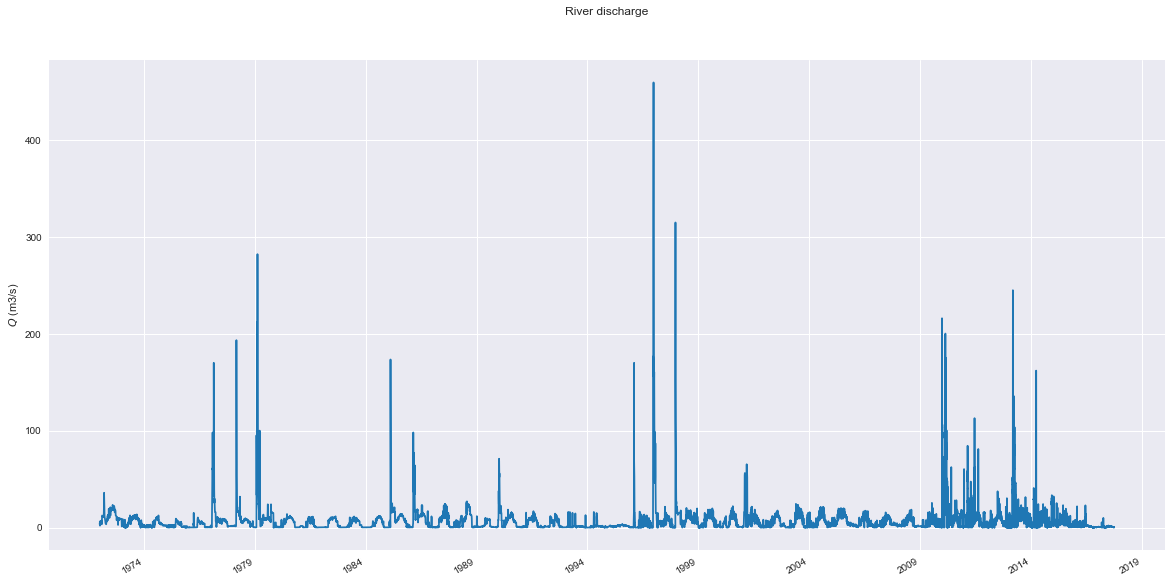

In [12]:
plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_series(modf_river_disch, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit)

## Plotting time series of linear variables in a specific period of time (i.e Peak period between 2015 & 2017)

This function plots the time series of a choosen linear variable in a specific period of time

In [16]:
initial_date = '2015-01-01'
final_date = '2018-01-01'

variable = 'Q'
title_label = 'Peak period'
ylabel = '$T_p$'
ylabel_unit = 's'
fig_x_size = 20
fig_y_size = 10

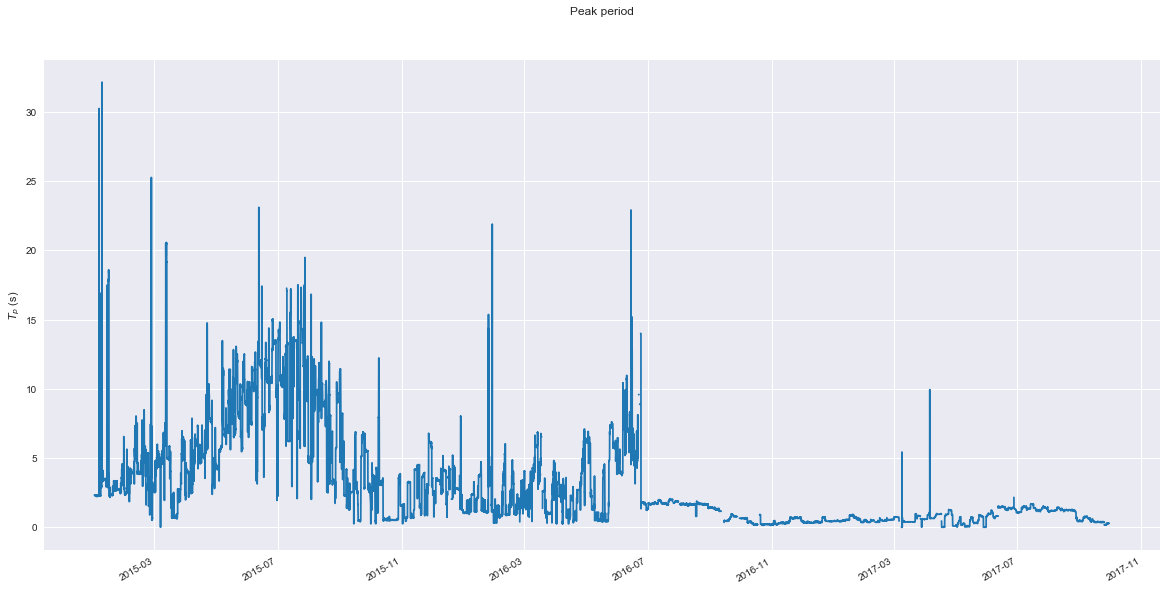

In [17]:
mask = ((modf_river_disch.index > initial_date) & (modf_river_disch.index < final_date))
data_simar_year = modf_river_disch.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_series(data_simar_year, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit)

## Plotting time series of circular variables in a specific period of time (i.e Mean wave direction between 2015 & 2017)

This function plots the time series of a choosen circular variable in a specific period of time

In [14]:
initial_date = '2016-01-01'
final_date = '2018-01-01'

variable = 'DirM'
title_label = 'Mean wave direction'
ylabel = '$Dir_Wv$'
ylabel_unit = 'º'
fig_x_size = 20
fig_y_size = 10

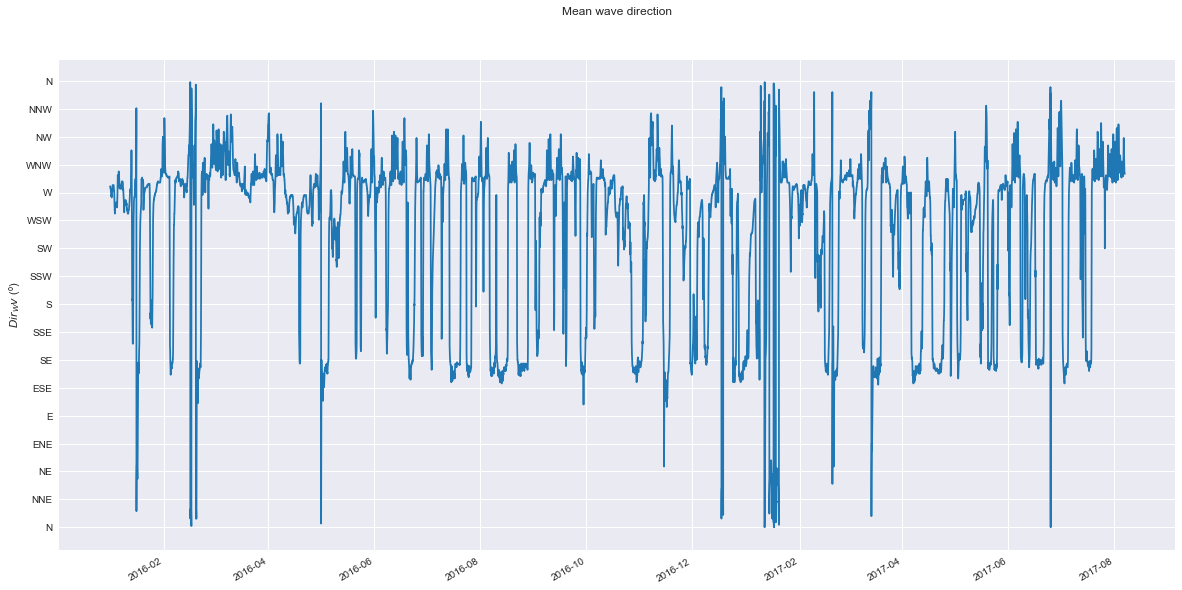

In [15]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_series(data_simar_year, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit, circular=True)

## Plotting trends (i.e. Significant wave height trend in 2016)

This function plots the trend of a choosen variable in a specific period of time

In [18]:
initial_date = '2016-01-01'
final_date = '2017-01-01'

variable = 'Q'
title_label = 'Significant wave height trend'
ylabel = '$H_s$'
ylabel_unit = 'm'
fig_x_size = 20
fig_y_size = 10

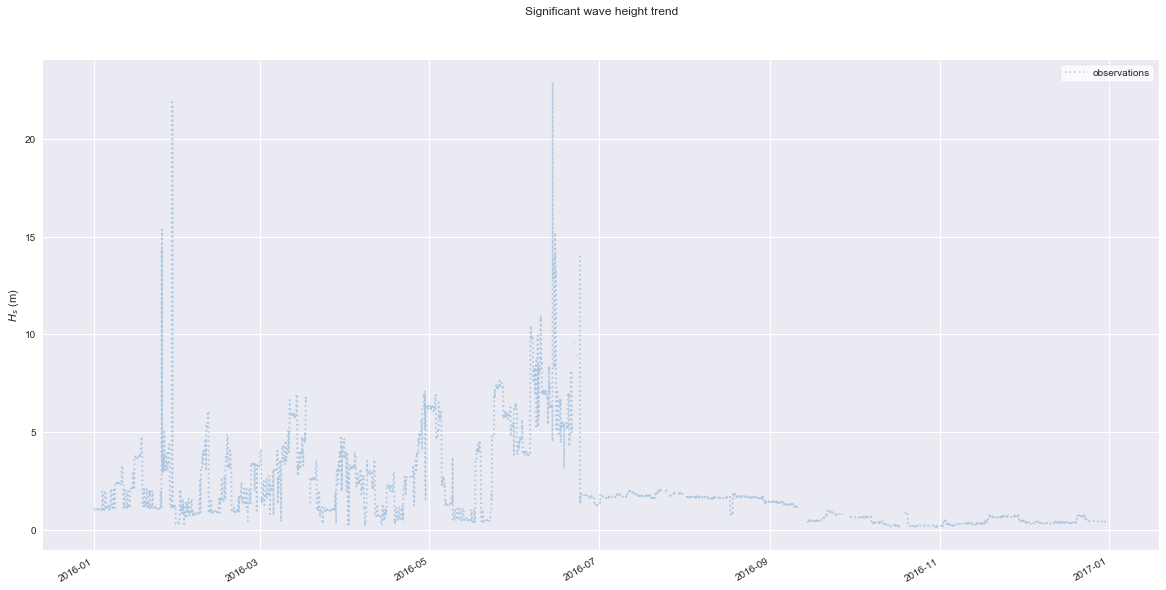

In [19]:
mask = ((modf_river_disch.index > initial_date) & (modf_river_disch.index < final_date))
data_simar_year = modf_river_disch.loc[mask, :]

plt.figure(figsize=(fig_x_size, fig_y_size))
summary.plot_series(data_simar_year, data_column=variable, title=title_label, var_name=ylabel, var_unit=ylabel_unit, show_trends=True)


## Plotting wave rose

This function plots the wave rose 

In [18]:
hs_column_label = 'Hm0'
dir_wv_column_label = 'DirM'
title_label = 'Wave rose'
label = '$H_s$'
label_unit = 'm'
fig_x_size = 20
fig_y_size = 10

C:\Users\GDFA-JUAN\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:52: RuntimeWarning: invalid value encountered in rint
  return getattr(obj, method)(*args, **kwds)


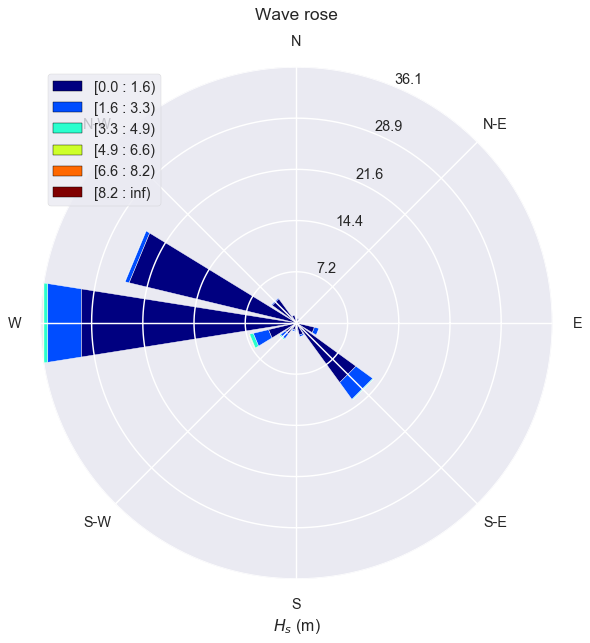

In [19]:
    plt.figure(figsize=(10,5))
    summary.plot_rose(data_simar, data_column=hs_column_label, dir_column=dir_wv_column_label , title=title_label, var_name=label, var_unit=label_unit)

## Plotting histogram and empirical density function of a choosen variable (i.e. Wind velocity)

This function plots the histogram and the empirical distribution function of a choosen variable in a specific period of time

In [20]:
initial_date = '1950-01-01'
final_date = '2017-01-01'

variable = 'Q'
title_label = 'Histogram & Empirical density function'
ylabel = '$Vel_{wd}$'
ylabel_unit = 'm/s'
fig_x_size = 20
fig_y_size = 10

In [39]:
modf_river_disch

<bound method MetOceanDF.dropna of                             Q
1972-01-01 00:00:00  3.703704
1972-01-01 01:00:00  3.703704
1972-01-01 02:00:00  3.703704
1972-01-01 03:00:00  3.703704
1972-01-01 04:00:00  3.703704
...                       ...
2017-09-29 20:00:00  0.297606
2017-09-29 21:00:00  0.294764
2017-09-29 22:00:00  0.292942
2017-09-29 23:00:00  0.293382
2017-09-30 00:00:00  0.293784

[400968 rows x 1 columns]>

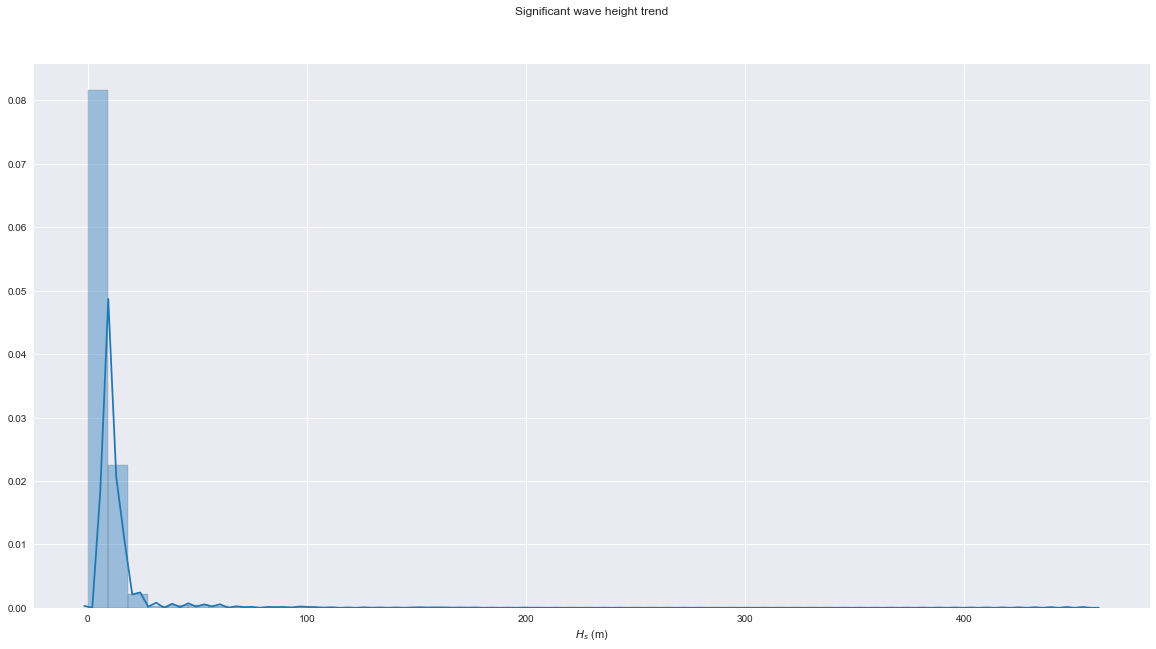

In [45]:
mask = ((modf_river_disch.index > initial_date) & (modf_river_disch.index < final_date))
data_simar_year = modf_river_disch.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_histogram(modf_river_disch[variable], title=title_label, var_name=ylabel, var_unit=ylabel_unit, rug=False, kernel=True)

## Plotting histogram and empirical density function of a choosen circular variable (i.e. Mean wind direction)

This function plots the histogram and the empirical distribution function of a choosen circular variable in a specific period of time

In [22]:
initial_date = '1950-01-01'
final_date = '2017-01-01'

variable = 'Q'
title_label = 'Histogram & Empirical density function'
ylabel = '$Dir_{wd}$'
ylabel_unit = '*'
fig_x_size = 20
fig_y_size = 10

ValueError: cannot convert float NaN to integer

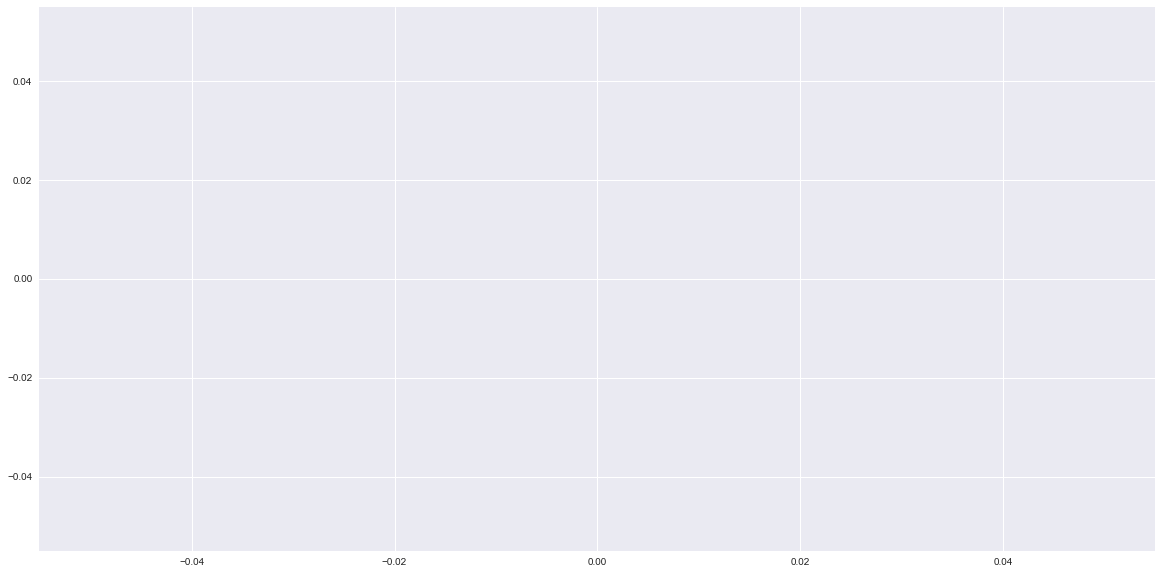

In [21]:
mask = ((modf_river_disch.index > initial_date) & (modf_river_disch.index < final_date))
data_simar_year = modf_river_disch.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_histogram(modf_river_disch[variable], title=title_label, var_name=ylabel, var_unit=ylabel_unit, rug=False, circular=True, kernel=True)

## Plotting scatter distribution of two variables (i.e. Significant wave heigh and peak period)

This function represents a scatter plot of two different variables in a specific period of time

In [24]:
initial_date = '2000-01-01'
final_date = '2017-01-01'

x_var = 'Hm0'
y_var = 'Tp'
title_label = 'Scatter plot'
xlabel = '$H_s$'
xlabel_unit = 'm'
ylabel = '$T_{p}$'
ylabel_unit = 's'
fig_x_size = 20
fig_y_size = 10

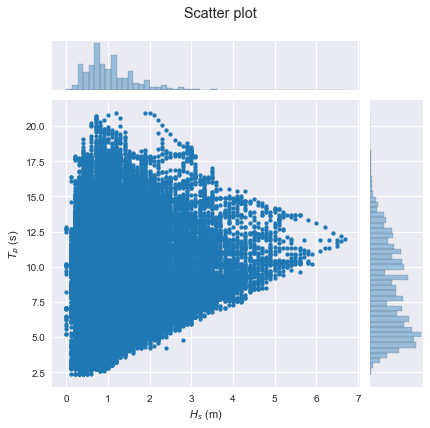

In [25]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]
    
plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_scatter(data_simar_year, x_var, y_var, title=title_label, x_var_name=xlabel, x_var_unit=xlabel_unit, y_var_name=ylabel, y_var_unit=ylabel_unit)


## Plotting scatter distribution of two variables (i.e. Wind velocity and mean wind direction)

In [26]:
initial_date = '2016-01-01'
final_date = '2017-01-01'

x_var = 'VelV'
y_var = 'DirV'
title_label = 'Scatter plot'
xlabel = '$Vel_{wd}$'
xlabel_unit = 'm/s'
ylabel = '$Dir_{wd}$'
ylabel_unit = 'º'
fig_x_size = 20
fig_y_size = 10

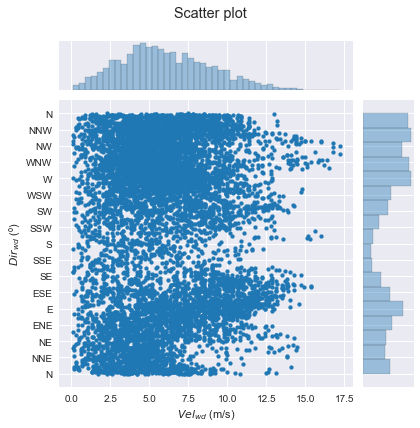

In [27]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]
    
plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_scatter(data_simar_year, x_var, y_var, title=title_label, x_var_name=xlabel, x_var_unit=xlabel_unit, y_var_name=ylabel, y_var_unit=ylabel_unit, circular='y')

## Plotting monthly variability of one linear variable in a specific period of time

In [46]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'Q'
frequency = 'month'
title_label = 'Monthly variability'
xlabel = '$H_{s}$'
xlabel_unit = 'm'
fig_x_size = 10
fig_y_size = 5

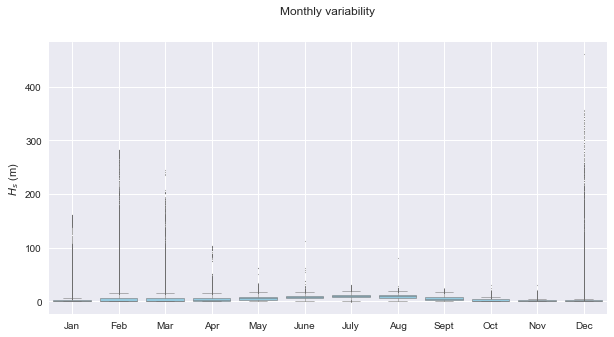

In [47]:
mask = ((modf_river_disch.index > initial_date) & (modf_river_disch.index < final_date))
data_simar_year = modf_river_disch.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(modf_river_disch[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit)

## Plotting yearly variability of one linear variable in a specific period of time

In [30]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'Hm0'
frequency = 'year'
title_label = 'Yearly variability'
xlabel = '$H_{s}$'
xlabel_unit = 'm'
fig_x_size = 50
fig_y_size = 10

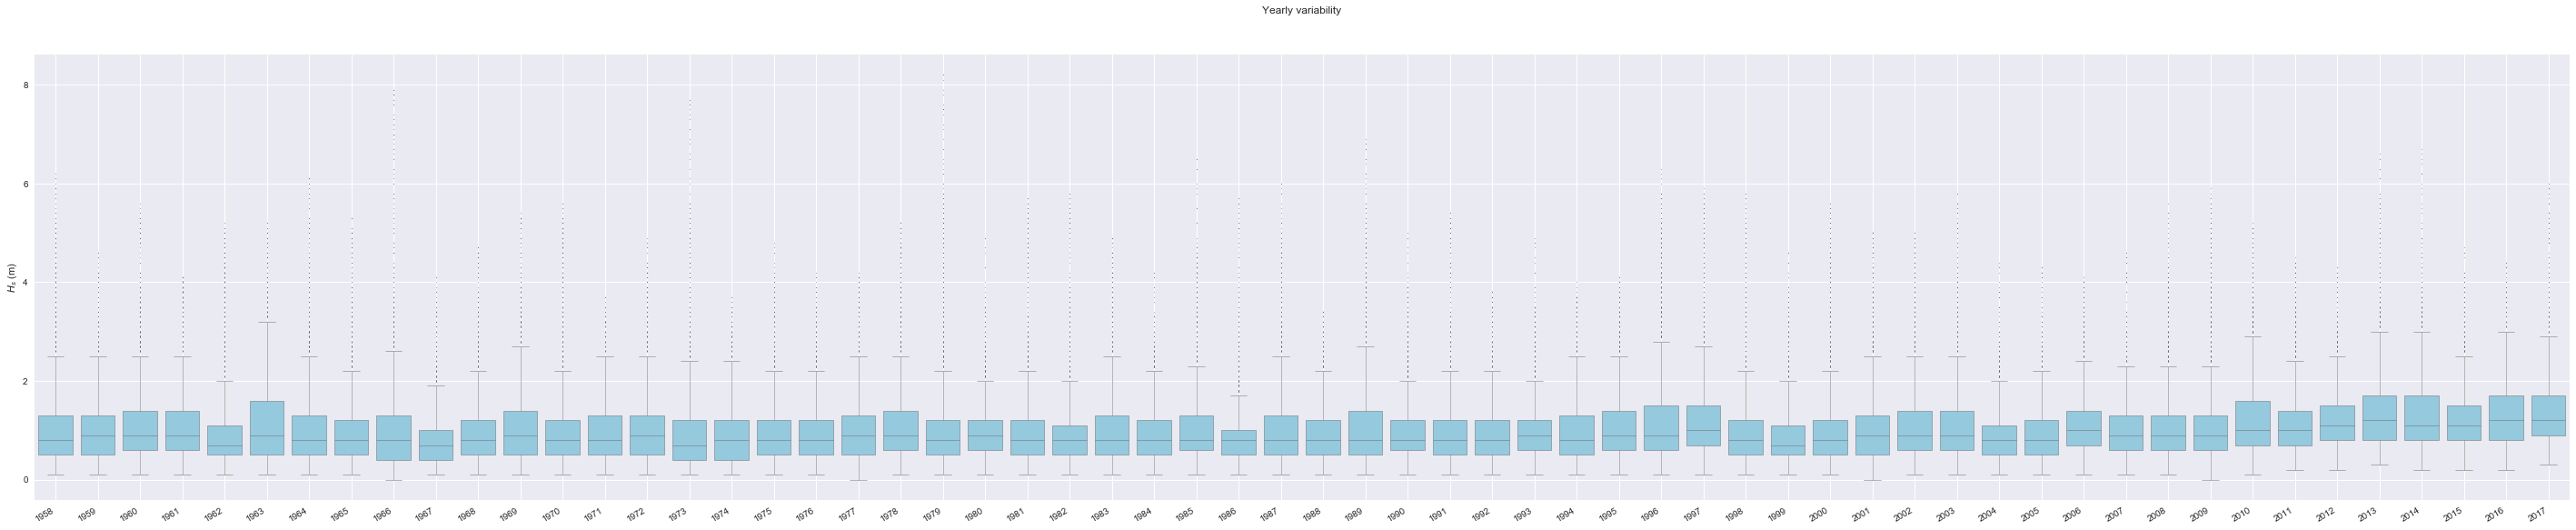

In [31]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(data_simar[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit)

## Plotting monthly variability of one circular variable in a specific period of time



In [32]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'DirM'
frequency = 'month'
title_label = 'Monthly variability'
xlabel = '$Dir_{wv}$'
xlabel_unit = 'º'
fig_x_size = 10
fig_y_size = 5

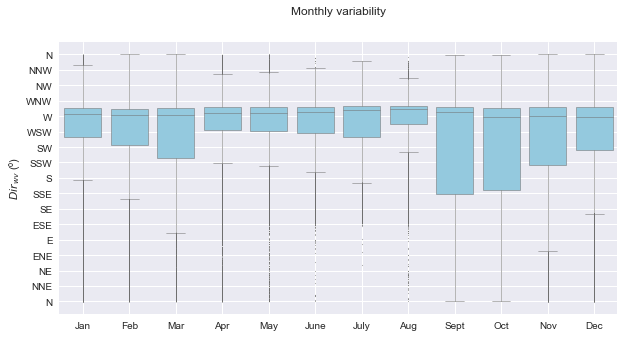

In [33]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(data_simar[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit, circular=True)

## Plotting yearly variability of one linear variable in a specific period of time

In [34]:
initial_date = '1950-01-01'
final_date = '2018-01-01'

variable = 'DirM'
frequency = 'year'
title_label = 'Yearly variability'
xlabel = '$Dir_{wv}$'
xlabel_unit = 'º'
fig_x_size = 50
fig_y_size = 10

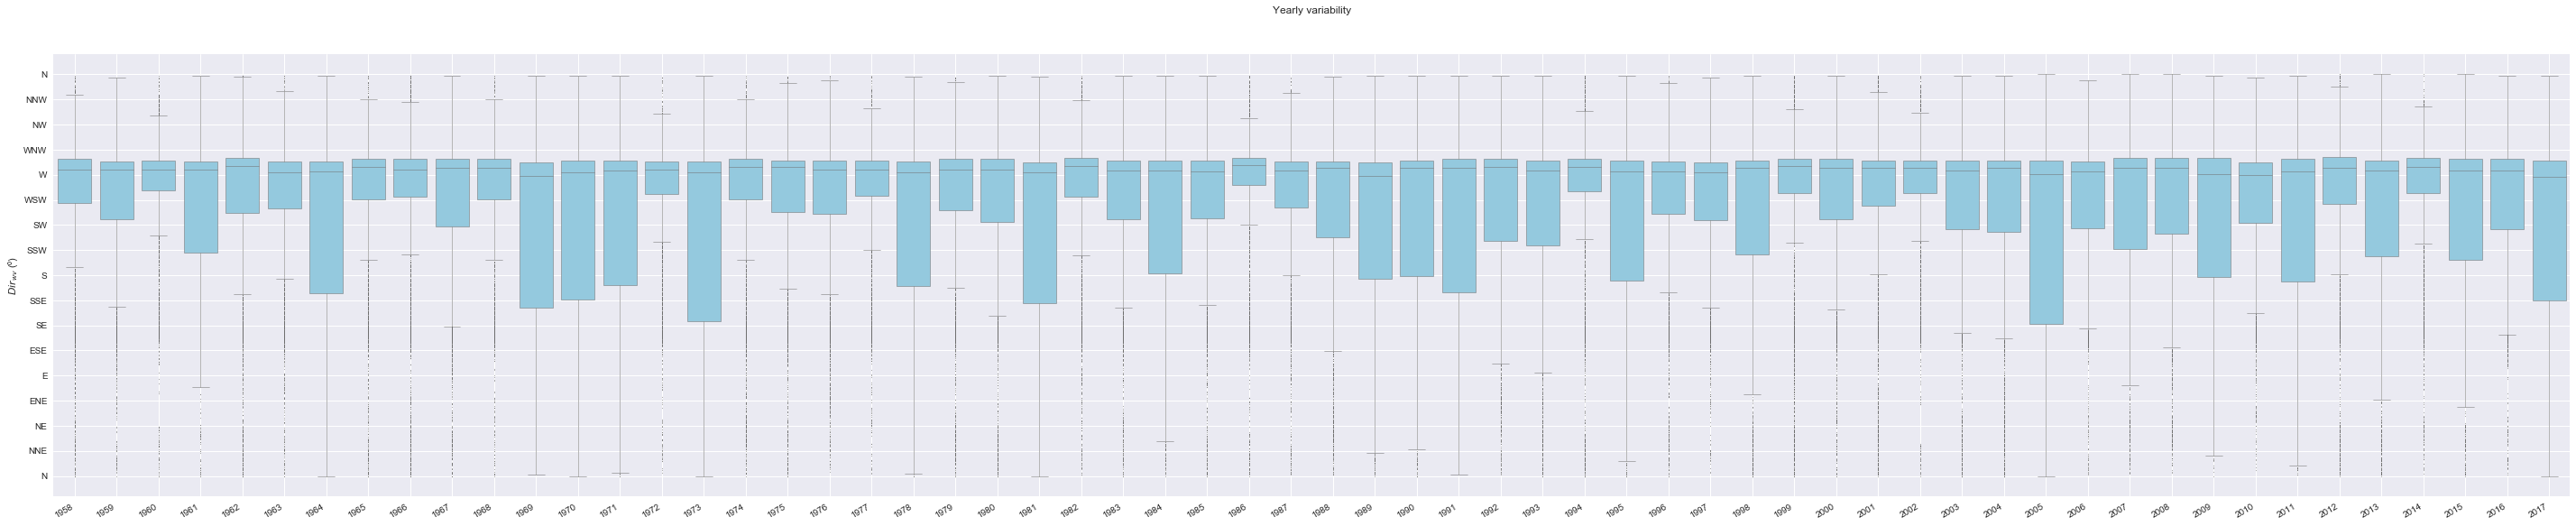

In [35]:
mask = ((data_simar.index > initial_date) & (data_simar.index < final_date))
data_simar_year = data_simar.loc[mask, :]

plt.figure(figsize=(fig_x_size,fig_y_size))
summary.plot_variability(data_simar[variable], frequency, title=title_label, var_name=xlabel, var_unit=xlabel_unit, circular=True)